# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.




### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = '/content/drive/MyDrive/project/'

#### 3) 데이터 읽어오기

In [ ]:
#file1 = 'data1.pkl'

In [11]:
data1= joblib.load('data1.pkl')

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [13]:
data1.head()

,Date,count,submission,boarding,mean_time,mean_fare,mean_dis,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,year,season,holidays,mean_time_rm,rates
0,2015-01-01,213,1023,924,23.2,2427,10764,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2015,win,New year,NaN,90.322581
1,2015-01-02,420,3158,2839,17.2,2216,8611,-4.3,-9.8,0.0,52.0,33.0,9.79,4,1,2015,win,0,NaN,89.898670
2,2015-01-03,209,1648,1514,26.2,2377,10198,-2.0,-8.9,0.0,63.0,28.0,9.07,5,1,2015,win,0,NaN,91.868932
3,2015-01-04,196,1646,1526,24.5,2431,10955,2.4,-9.2,0.0,73.0,37.0,8.66,6,1,2015,win,0,NaN,92.709599
4,2015-01-05,421,4250,3730,26.2,2214,8663,8.2,0.2,0.0,89.0,58.0,5.32,0,1,2015,win,0,NaN,87.764706


In [84]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2923 non-null   datetime64[ns]
 1   count            2923 non-null   int64         
 2   submission       2923 non-null   int64         
 3   boarding         2923 non-null   int64         
 4   mean_time        2923 non-null   float64       
 5   mean_fare        2923 non-null   int64         
 6   mean_dis         2923 non-null   int64         
 7   temp_max         2922 non-null   float64       
 8   temp_min         2922 non-null   float64       
 9   rain(mm)         2922 non-null   float64       
 10  humidity_max(%)  2922 non-null   float64       
 11  humidity_min(%)  2922 non-null   float64       
 12  sunshine(MJ/m2)  2922 non-null   float64       
 13  weekday          2923 non-null   category      
 14  month            2923 non-null   categor

In [24]:
def numeric_variable(df, column_name):
    des = df[column_name].describe()
    
    sns.histplot(data=df, x=df[column_name])
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.show()

    return des

In [19]:
# 범주형 변수 분석
def categorical_variable(df, column_name):
    des = df[column_name].value_counts()
    des1 = df[column_name].value_counts(normalize=True)

    sns.countplot(data=df, x=column_name)
    plt.show()

    return des, des1

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [20]:
data1.columns

Index(['Date', 'count', 'submission', 'boarding', 'mean_time', 'mean_fare',
       'mean_dis', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday', 'month', 'year',
       'season', 'holidays', 'mean_time_rm', 'rates'],
      dtype='object')

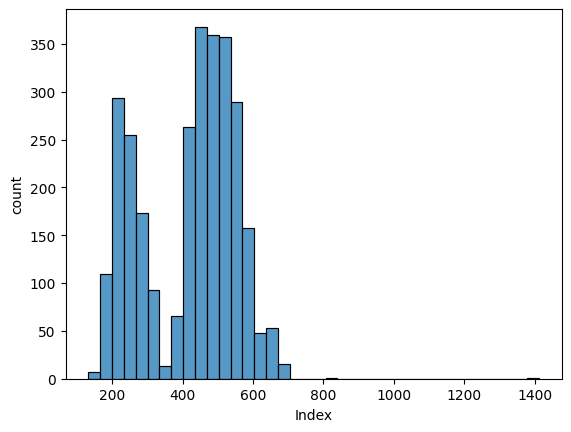

count    2923.000000
mean      418.647622
std       133.764485
min       132.000000
25%       278.000000
50%       454.000000
75%       522.000000
max      1413.000000
Name: count, dtype: float64

In [25]:
numeric_variable(data1, 'count')

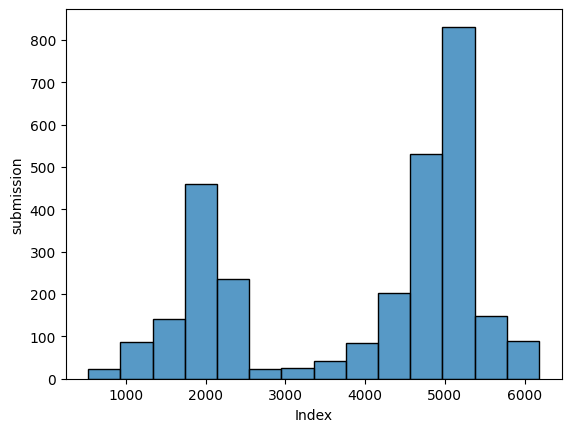

count    2923.000000
mean     3924.838180
std      1510.056733
min       527.000000
25%      2161.000000
50%      4720.000000
75%      5110.000000
max      6182.000000
Name: submission, dtype: float64

In [26]:
numeric_variable(data1, 'submission')

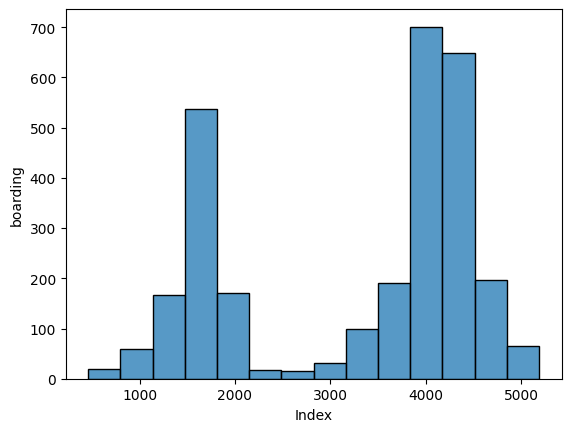

count    2923.000000
mean     3283.234348
std      1249.463168
min       462.000000
25%      1778.500000
50%      3932.000000
75%      4241.000000
max      5189.000000
Name: boarding, dtype: float64

In [27]:
numeric_variable(data1, 'boarding')

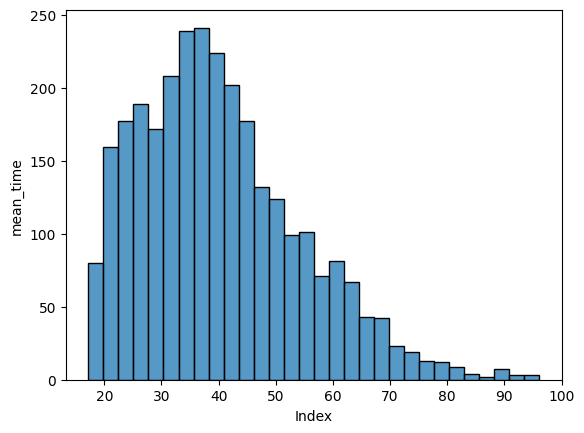

count    2923.000000
mean       40.300171
std        14.099285
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: mean_time, dtype: float64

In [28]:
numeric_variable(data1, 'mean_time')

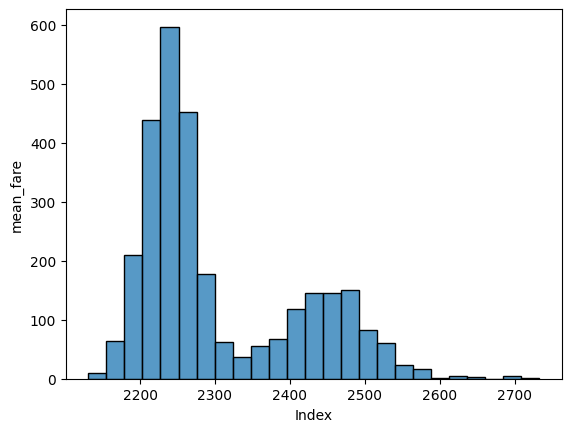

count    2923.000000
mean     2304.362299
std       107.351769
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2401.000000
max      2733.000000
Name: mean_fare, dtype: float64

In [29]:
numeric_variable(data1, 'mean_fare')

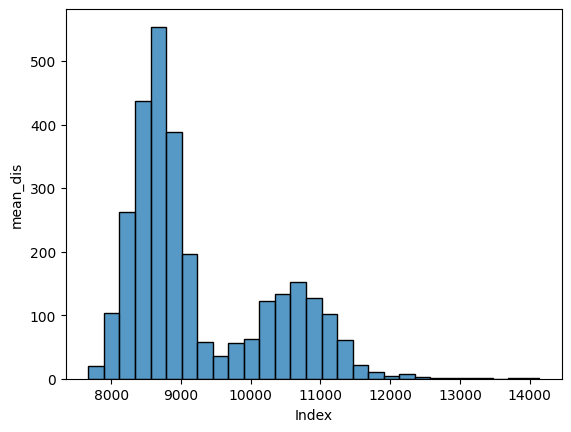

count     2923.000000
mean      9254.353062
std       1020.066902
min       7672.000000
25%       8521.000000
50%       8822.000000
75%      10154.000000
max      14136.000000
Name: mean_dis, dtype: float64

In [30]:
numeric_variable(data1, 'mean_dis')

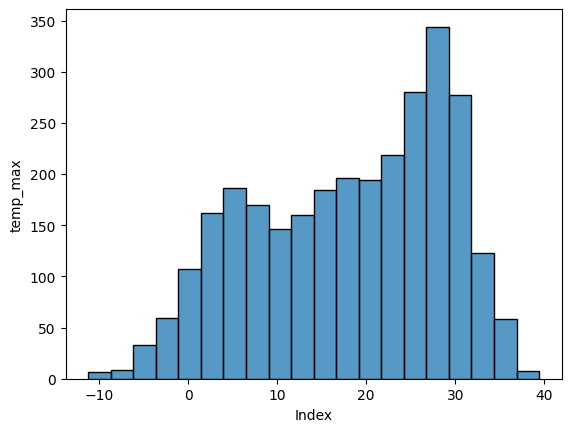

count    2922.000000
mean       18.081177
std        10.706657
min       -11.200000
25%         9.000000
50%        19.700000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64

In [31]:
numeric_variable(data1, 'temp_max')

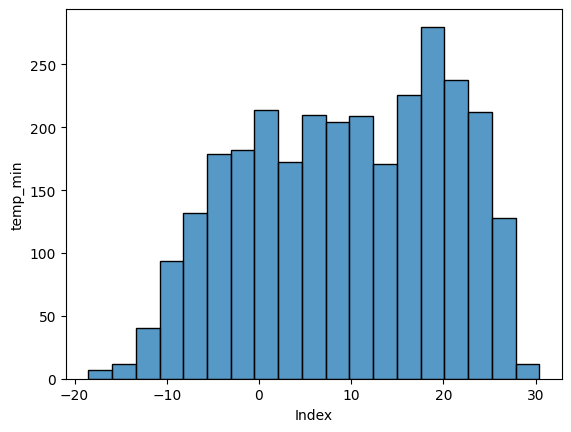

count    2922.000000
mean        9.414887
std        10.786241
min       -18.500000
25%         0.500000
50%        10.000000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64

In [32]:
numeric_variable(data1, 'temp_min')

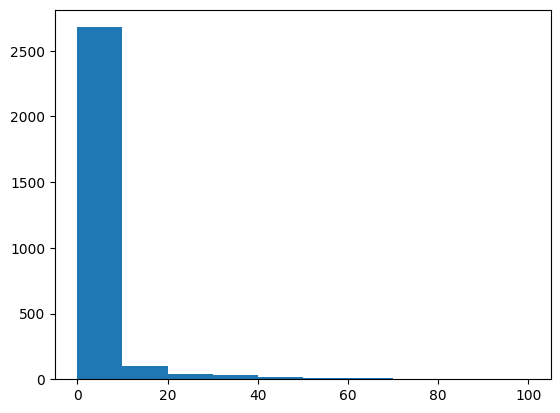

count    2922.000000
mean        3.356468
std        12.595661
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64

In [49]:
plt.hist(data1['rain(mm)'], bins=10, range=(0, 100))
plt.show()

data1['rain(mm)'].describe()

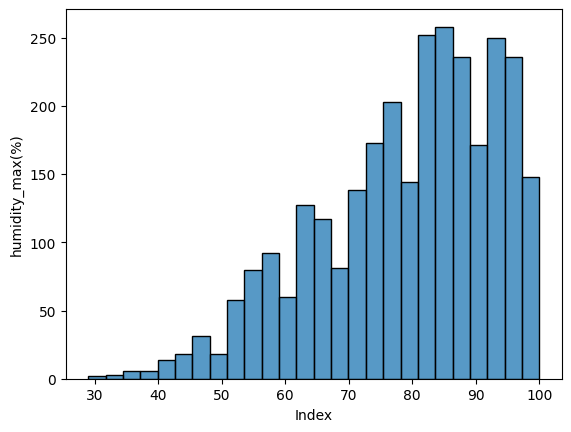

count    2922.000000
mean       79.104038
std        14.031002
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64

In [34]:
numeric_variable(data1, 'humidity_max(%)')

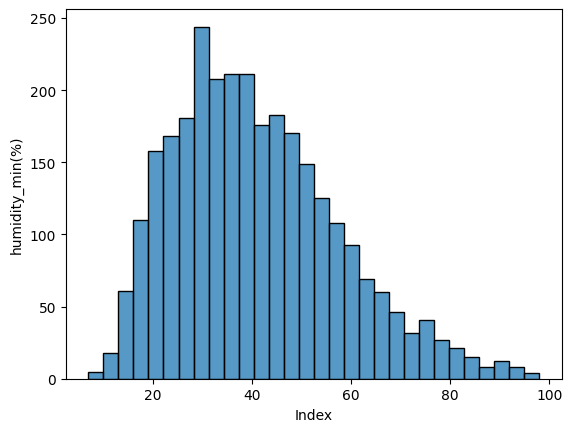

count    2922.000000
mean       41.106023
std        16.393367
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64

In [35]:
numeric_variable(data1, 'humidity_min(%)')

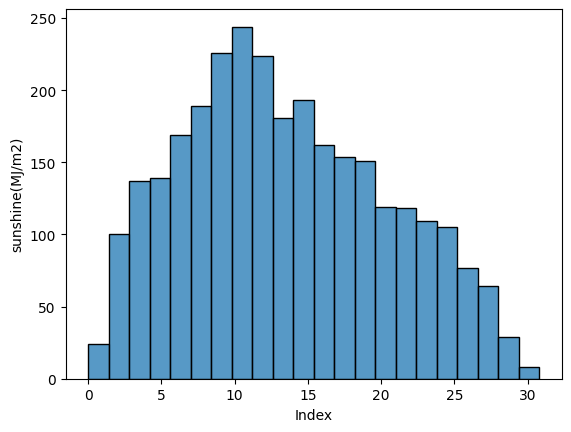

count    2922.000000
mean       13.500257
std         6.935825
min         0.000000
25%         8.250000
50%        12.670000
75%        18.580000
max        30.790000
Name: sunshine(MJ/m2), dtype: float64

In [36]:
numeric_variable(data1, 'sunshine(MJ/m2)')

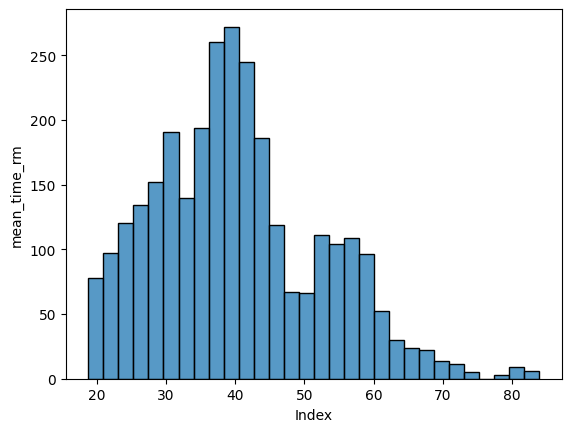

count    2917.000000
mean       40.317165
std        12.030254
min        18.800000
25%        31.300000
50%        39.042857
75%        46.985714
max        83.928571
Name: mean_time_rm, dtype: float64

In [37]:
numeric_variable(data1, 'mean_time_rm')

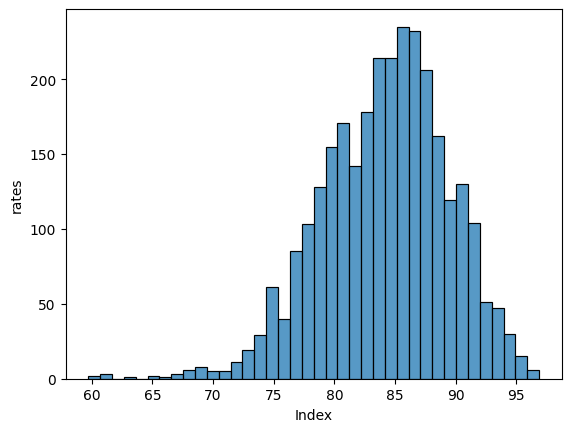

count    2923.000000
mean       84.156482
std         5.216705
min        59.699625
25%        80.596425
50%        84.557110
75%        87.771823
max        96.884422
Name: rates, dtype: float64

In [38]:
numeric_variable(data1, 'rates')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [50]:
data1.columns

Index(['Date', 'count', 'submission', 'boarding', 'mean_time', 'mean_fare',
       'mean_dis', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday', 'month', 'year',
       'season', 'holidays', 'mean_time_rm', 'rates'],
      dtype='object')

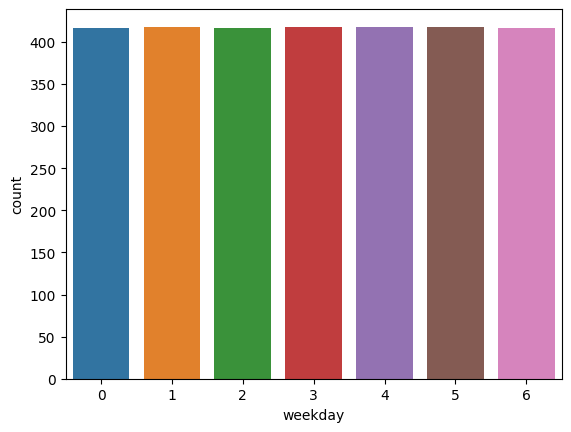

(1    418
 3    418
 4    418
 5    418
 0    417
 2    417
 6    417
 Name: weekday, dtype: int64,
 1    0.143004
 3    0.143004
 4    0.143004
 5    0.143004
 0    0.142662
 2    0.142662
 6    0.142662
 Name: weekday, dtype: float64)

In [52]:
categorical_variable(data1, 'weekday')

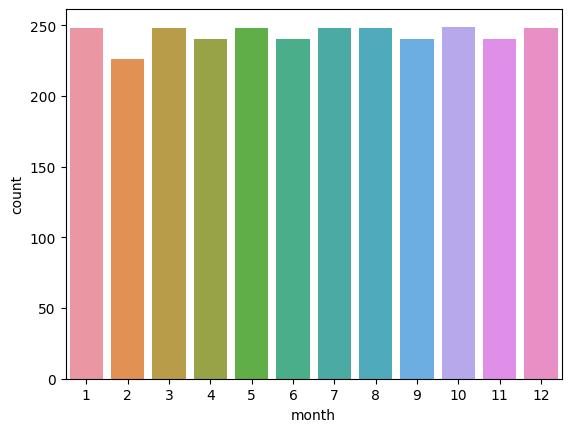

(10    249
 1     248
 3     248
 5     248
 7     248
 8     248
 12    248
 4     240
 6     240
 9     240
 11    240
 2     226
 Name: month, dtype: int64,
 10    0.085186
 1     0.084844
 3     0.084844
 5     0.084844
 7     0.084844
 8     0.084844
 12    0.084844
 4     0.082107
 6     0.082107
 9     0.082107
 11    0.082107
 2     0.077318
 Name: month, dtype: float64)

In [53]:
categorical_variable(data1, 'month')

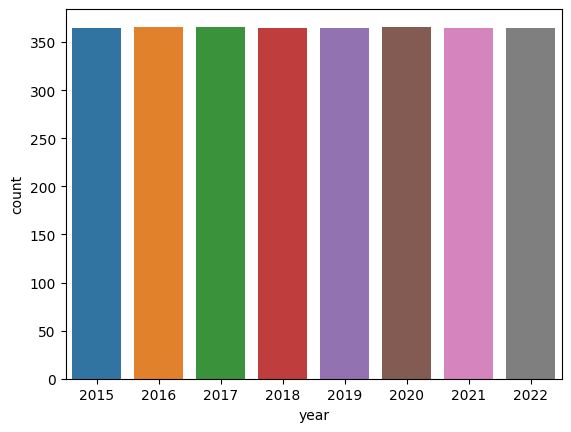

(2016    366
 2017    366
 2020    366
 2015    365
 2018    365
 2019    365
 2021    365
 2022    365
 Name: year, dtype: int64,
 2016    0.125214
 2017    0.125214
 2020    0.125214
 2015    0.124872
 2018    0.124872
 2019    0.124872
 2021    0.124872
 2022    0.124872
 Name: year, dtype: float64)

In [54]:
categorical_variable(data1, 'year')

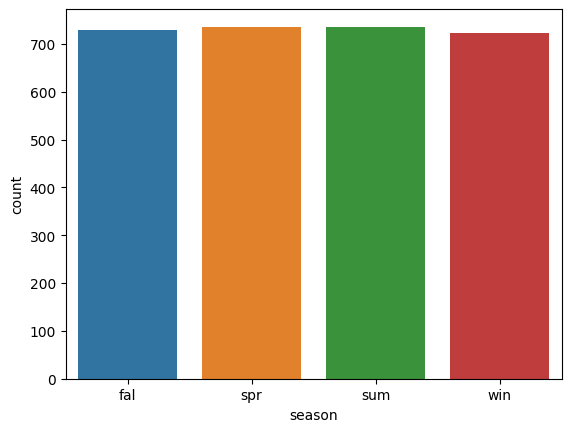

(spr    736
 sum    736
 fal    729
 win    722
 Name: season, dtype: int64,
 spr    0.251796
 sum    0.251796
 fal    0.249401
 win    0.247007
 Name: season, dtype: float64)

In [55]:
categorical_variable(data1, 'season')

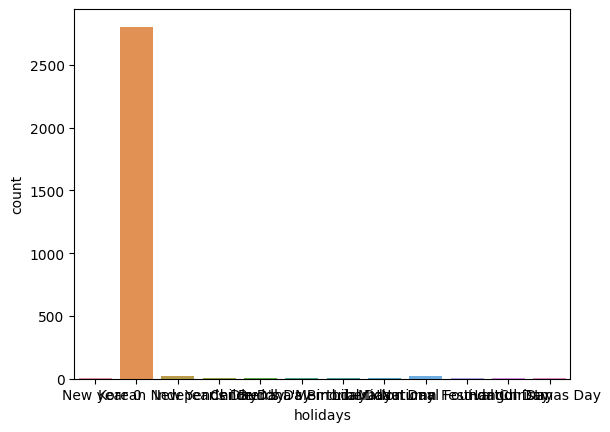

(0                          2803
 Korean New Year's Day        24
 Midautumn Festival           24
 New year                      8
 Independence Day              8
 Children's Day                8
 Buddha's Birthday             8
 Memorial Day                  8
 Liberation Day                8
 National Foundation Day       8
 Hangul Day                    8
 Christmas Day                 8
 Name: holidays, dtype: int64,
 0                          0.958946
 Korean New Year's Day      0.008211
 Midautumn Festival         0.008211
 New year                   0.002737
 Independence Day           0.002737
 Children's Day             0.002737
 Buddha's Birthday          0.002737
 Memorial Day               0.002737
 Liberation Day             0.002737
 National Foundation Day    0.002737
 Hangul Day                 0.002737
 Christmas Day              0.002737
 Name: holidays, dtype: float64)

In [56]:
categorical_variable(data1, 'holidays')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [62]:
target = 'mean_time'

<ipython-input-69-ed12a4a3dea0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True, cbar=False)


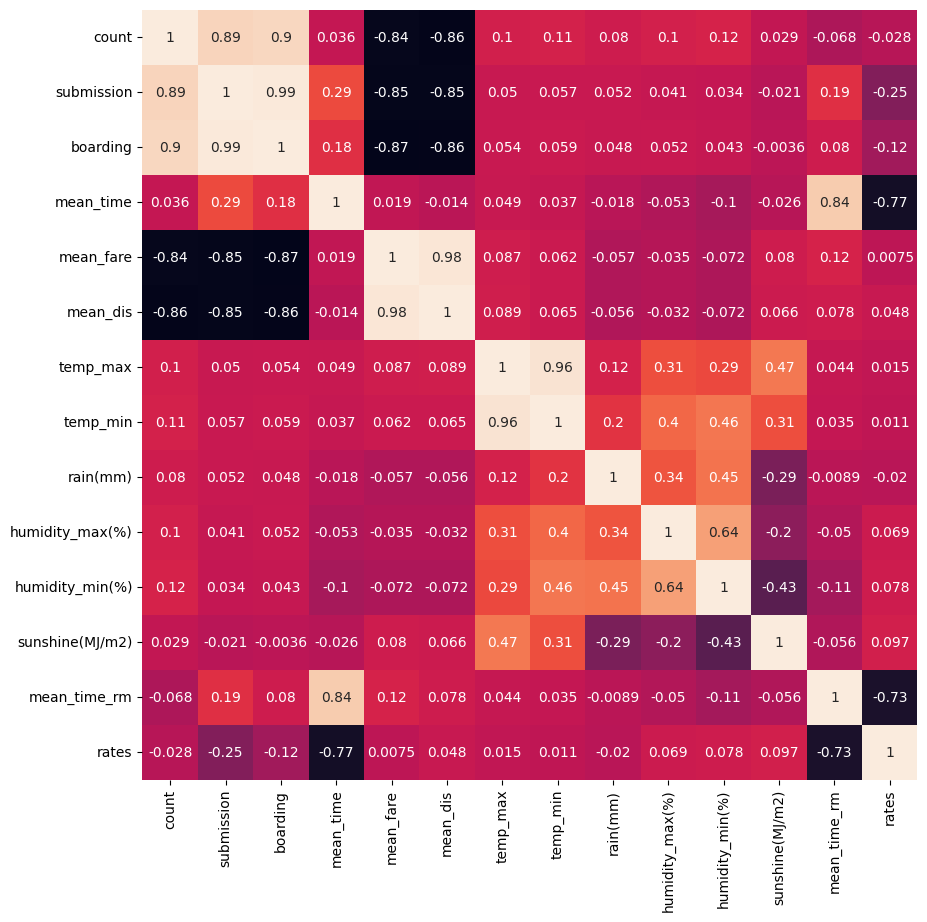

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True, cbar=False)
plt.show()

#### 2) 산점도

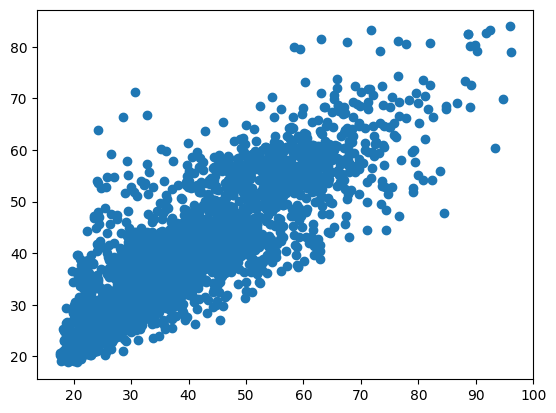

In [65]:
plt.scatter(target, 'mean_time_rm', data=data1)
plt.show()

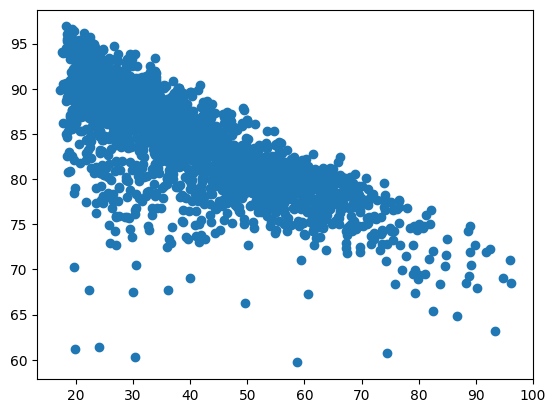

In [68]:
plt.scatter(target, 'rates', data=data1)
plt.show()

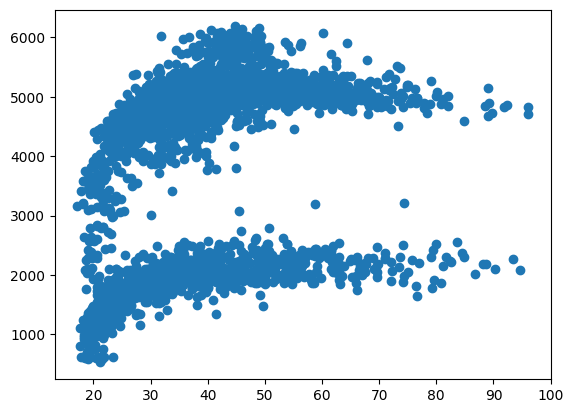

In [67]:
plt.scatter(target, 'submission', data=data1)
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [70]:
data1.columns

Index(['Date', 'count', 'submission', 'boarding', 'mean_time', 'mean_fare',
       'mean_dis', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday', 'month', 'year',
       'season', 'holidays', 'mean_time_rm', 'rates'],
      dtype='object')

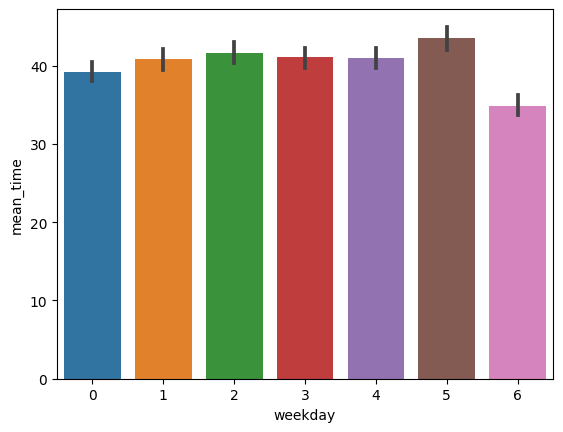

In [72]:
sns.barplot(data=data1, x='weekday', y=target)
plt.show()

In [80]:
temp = data1.loc[data1[target].notnull()]
p1 = temp.loc[temp['weekday'] == 0, target]
p2 = temp.loc[temp['weekday'] == 1, target]
p3 = temp.loc[temp['weekday'] == 2, target]
p4 = temp.loc[temp['weekday'] == 3, target]
p5 = temp.loc[temp['weekday'] == 4, target]
p6 = temp.loc[temp['weekday'] == 5, target]
p7 = temp.loc[temp['weekday'] == 6, target]
spst.f_oneway(p1,p2,p3,p4,p5,p6,p7)

F_onewayResult(statistic=15.66669048966133, pvalue=8.814291693785567e-18)

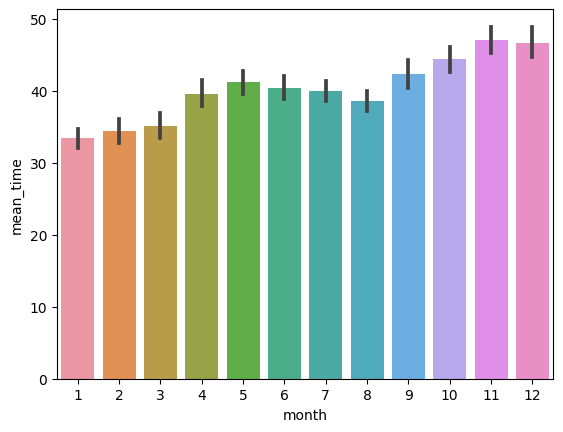

In [73]:
sns.barplot(data=data1, x='month', y=target)
plt.show()

In [82]:
temp = data1.loc[data1[target].notnull()]
p1 = temp.loc[temp['month'] == 1, target]
p2 = temp.loc[temp['month'] == 2, target]
p3 = temp.loc[temp['month'] == 3, target]
p4 = temp.loc[temp['month'] == 4, target]
p5 = temp.loc[temp['month'] == 5, target]
p6 = temp.loc[temp['month'] == 6, target]
p7 = temp.loc[temp['month'] == 7, target]
p8 = temp.loc[temp['month'] == 8, target]
p9 = temp.loc[temp['month'] == 9, target]
p10 = temp.loc[temp['month'] == 10, target]
p11 = temp.loc[temp['month'] == 11, target]
p12 = temp.loc[temp['month'] == 12, target]
spst.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12)

F_onewayResult(statistic=26.894509535179676, pvalue=4.921705948368874e-54)

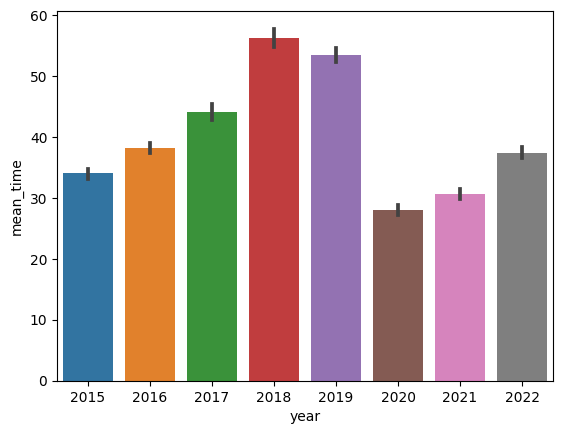

In [74]:
sns.barplot(data=data1, x='year', y=target)
plt.show()

In [85]:
temp = data1.loc[data1[target].notnull()]
p1 = temp.loc[temp['year'] == 2015, target]
p2 = temp.loc[temp['year'] == 2016, target]
p3 = temp.loc[temp['year'] == 2017, target]
p4 = temp.loc[temp['year'] == 2018, target]
p5 = temp.loc[temp['year'] == 2019, target]
p6 = temp.loc[temp['year'] == 2020, target]
p7 = temp.loc[temp['year'] == 2021, target]
p8 = temp.loc[temp['year'] == 2022, target]
spst.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8)

F_onewayResult(statistic=359.77447590794173, pvalue=0.0)

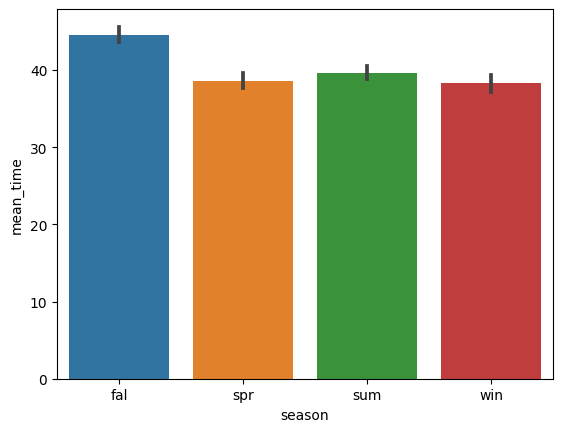

In [75]:
sns.barplot(data=data1, x='season', y=target)
plt.show()

In [86]:
temp = data1.loc[data1[target].notnull()]
p1 = temp.loc[temp['season'] == 'spr', target]
p2 = temp.loc[temp['season'] == 'sum', target]
p3 = temp.loc[temp['season'] == 'fal', target]
p4 = temp.loc[temp['season'] == 'win', target]
spst.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8)

F_onewayResult(statistic=154.15385227410601, pvalue=4.254828266878383e-204)

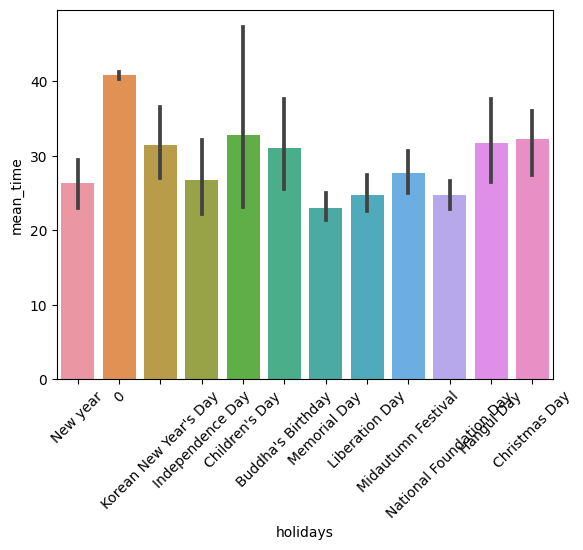

In [77]:
sns.barplot(data=data1, x='holidays', y=target)
plt.xticks(rotation=45)
plt.show()

In [88]:
data1['holidays'].value_counts()

0                          2803
Korean New Year's Day        24
Midautumn Festival           24
New year                      8
Independence Day              8
Children's Day                8
Buddha's Birthday             8
Memorial Day                  8
Liberation Day                8
National Foundation Day       8
Hangul Day                    8
Christmas Day                 8
Name: holidays, dtype: int64

In [90]:
temp = data1.loc[data1[target].notnull()]
p1 = temp.loc[temp['holidays'] == 'Korean New Year\'s Day', target]
p2 = temp.loc[temp['holidays'] == 'Midautumn Festival', target]
p3 = temp.loc[temp['holidays'] == 'New year', target]
p4 = temp.loc[temp['holidays'] == 'Independence Day', target]
p5 = temp.loc[temp['holidays'] == 'Children\'s Day', target]
p6 = temp.loc[temp['holidays'] == 'Buddha\'s Birthday', target]
p7 = temp.loc[temp['holidays'] == 'Memorial Day', target]
p8 = temp.loc[temp['holidays'] == 'Liberation Day', target]
p9 = temp.loc[temp['holidays'] == 'National Foundation Day', target]
p10 = temp.loc[temp['holidays'] == 'Hangul Day', target]
p11 = temp.loc[temp['holidays'] == 'Christmas Day', target]
spst.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11)

F_onewayResult(statistic=1.2542572533437937, pvalue=0.2654943819209831)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

In [78]:
data1.columns

Index(['Date', 'count', 'submission', 'boarding', 'mean_time', 'mean_fare',
       'mean_dis', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday', 'month', 'year',
       'season', 'holidays', 'mean_time_rm', 'rates'],
      dtype='object')

* 강한 관계의 변수

In [ ]:
'mean_time_rm', 'rates', 'weekday', 'month', 'year',
       'season',  'mean_time_rm', 'rates'

* 중간(약한) 관계의 변수

In [ ]:
'submission', 'boarding', 'humidity_min(%)'

* (거의) 관계가 없는 변수

In [ ]:
'count','holidays','mean_fare',
       'mean_dis', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)','sunshine(MJ/m2)'

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [91]:
joblib.dump(data1, 'data2.pkl')

['data2.pkl']